In [33]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import joblib

In [34]:

df = pd.read_csv('tyg.csv')
df.head()

,subject_id,hadm_id,stay_id,intime,age,gender,race,los,diabetes,hypertension,...,has_ercp,has_vasopressin,los_icu,los_hosp,hosp_mortality,icu_mortality,mortality_7d,mortality_28d,mortality_90d,mortality_1y
0,10004606,29242151,30213599,2159-02-20 16:10:03,64,F,WHITE,5.166100,0,1,...,0,0,5.166100,14.130556,0,0,0,0,0,0
1,10006441,24120560,37240744,2174-09-12 16:57:04,51,M,WHITE,0.776481,0,0,...,0,0,0.776481,15.834722,0,0,0,0,0,0
2,10007795,28477357,31921355,2136-04-22 18:01:13,53,F,WHITE,1.050521,0,1,...,0,0,1.050521,21.834722,0,0,0,0,0,0
3,10010888,20162667,33318955,2174-01-09 00:21:00,43,M,WHITE,9.019225,1,0,...,0,0,9.019225,17.736806,0,0,0,0,0,0
4,10012206,23961896,37675714,2127-07-04 02:08:00,45,M,WHITE,0.572477,1,1,...,0,0,0.572477,10.655556,0,0,0,0,0,0


In [35]:
encoder = OrdinalEncoder()
df[['gender', 'race']] = encoder.fit_transform(df[['gender', 'race']])

In [36]:
df.head()

,subject_id,hadm_id,stay_id,intime,age,gender,race,los,diabetes,hypertension,...,has_ercp,has_vasopressin,los_icu,los_hosp,hosp_mortality,icu_mortality,mortality_7d,mortality_28d,mortality_90d,mortality_1y
0,10004606,29242151,30213599,2159-02-20 16:10:03,64,0.0,22.0,5.166100,0,1,...,0,0,5.166100,14.130556,0,0,0,0,0,0
1,10006441,24120560,37240744,2174-09-12 16:57:04,51,1.0,22.0,0.776481,0,0,...,0,0,0.776481,15.834722,0,0,0,0,0,0
2,10007795,28477357,31921355,2136-04-22 18:01:13,53,0.0,22.0,1.050521,0,1,...,0,0,1.050521,21.834722,0,0,0,0,0,0
3,10010888,20162667,33318955,2174-01-09 00:21:00,43,1.0,22.0,9.019225,1,0,...,0,0,9.019225,17.736806,0,0,0,0,0,0
4,10012206,23961896,37675714,2127-07-04 02:08:00,45,1.0,22.0,0.572477,1,1,...,0,0,0.572477,10.655556,0,0,0,0,0,0


In [37]:
[ (col, df[col].isna().sum()) for col in df.columns if df[col].isna().sum() > 0]

[('neutrophils_max', 64), ('neutrophils_min', 64), ('npar', 64)]

In [38]:
[ col for col in df.columns if df[col].isna().sum() > 0]

['neutrophils_max', 'neutrophils_min', 'npar']

In [39]:
imp = IterativeImputer(max_iter=100)
cols_miss = ['diabetes', 'hypertension', 'wbc', 'rbc', 'rdw', 'hemoglobin',
       'platelets', 'aniongap', 'bicarbonate', 'calcium', 'chloride',
       'potassium', 'creatinine', 'glucose', 'triglycerides', 'alt', 'alp',
       'ast', 'pt', 'ptt', 'inr', 'tyg', 'neutrophils_max', 'neutrophils_min', 'npar']
df[cols_miss] = imp.fit_transform(df[cols_miss])

In [40]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'age', 'gender', 'race',
       'los', 'diabetes', 'hypertension', 'wbc', 'rbc', 'rdw', 'hemoglobin',
       'platelets', 'aniongap', 'bicarbonate', 'calcium', 'chloride',
       'potassium', 'creatinine', 'glucose', 'triglycerides', 'alt', 'alp',
       'ast', 'pt', 'ptt', 'inr', 'neutrophils_max', 'neutrophils_min',
       'albumin_max', 'albumin_min', 'bun_max', 'bun_min', 'sepsis',
       'sepsis_3', 'npar', 'tyg', 'sofa', 'has_sepsis', 'aki',
       'has_chronic_kidney_disease', 'has_crrt', 'has_mv', 'has_ercp',
       'has_vasopressin', 'los_icu', 'los_hosp', 'hosp_mortality',
       'icu_mortality', 'mortality_7d', 'mortality_28d', 'mortality_90d',
       'mortality_1y'],
      dtype='object')

In [41]:
cols = [
    'age', 'gender', 'race',
       'los', 'diabetes', 'hypertension', 'wbc', 'rbc', 'rdw', 'hemoglobin',
       'platelets', 'aniongap', 'bicarbonate', 'calcium', 'chloride',
       'potassium', 'creatinine', 'glucose', 'triglycerides', 'alt', 'alp',
       'ast', 'pt', 'ptt', 'inr', 'neutrophils_max', 'neutrophils_min',
       'albumin_max', 'albumin_min', 'bun_max', 'bun_min',
       'sepsis_3', 'npar', 'tyg', 'sofa', 'has_sepsis', 'aki',
       'has_chronic_kidney_disease', 'has_crrt', 'has_mv', 'has_ercp',
       'has_vasopressin', 'los_icu', 'los_hosp'
]
X, y = df[cols], df['sepsis']

In [42]:
X_train, X_test, y_train, y_test, = train_test_split(X, y)

In [43]:
# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# rfc.score(X_train, y_train), rfc.score(X_test, y_test)

In [44]:
# RocCurveDisplay.from_estimator(estimator=rfc, X = X_test, y = y_test)
# plt.show()

In [45]:
# models = {
#     'Ada Boost': AdaBoostClassifier(),
#     'Extra Trees': ExtraTreesClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Random Forest': RandomForestClassifier()
# }

# mortalities = ['mortality_7d', 'mortality_28d', 'mortality_90d', 'mortality_1y']
# X, Y = df[cols], df[mortalities]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2026)
# titles = ['7 days', '28 days', '90 days', '1 years']
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))
# for i in range(len(mortalities)):
#     y_train, y_test = Y_train[mortalities[i]], Y_test[mortalities[i]]
#     for name in models:
#         model = models[name]
#         model.fit(X_train, y_train)
#         RocCurveDisplay.from_estimator(estimator=model, X=X_test, y=y_test, ax=axes[i], name=name)
#     axes[i].set_title(titles[i])
# plt.show()


Training Ada Boost for mortality_7d...
Training Extra Trees for mortality_7d...
Training Gradient Boosting for mortality_7d...
Training Random Forest for mortality_7d...
Training Ada Boost for mortality_28d...
Training Extra Trees for mortality_28d...
Training Gradient Boosting for mortality_28d...
Training Random Forest for mortality_28d...
Training Ada Boost for mortality_90d...
Training Extra Trees for mortality_90d...
Training Gradient Boosting for mortality_90d...
Training Random Forest for mortality_90d...
Training Ada Boost for mortality_1y...
Training Extra Trees for mortality_1y...
Training Gradient Boosting for mortality_1y...
Training Random Forest for mortality_1y...


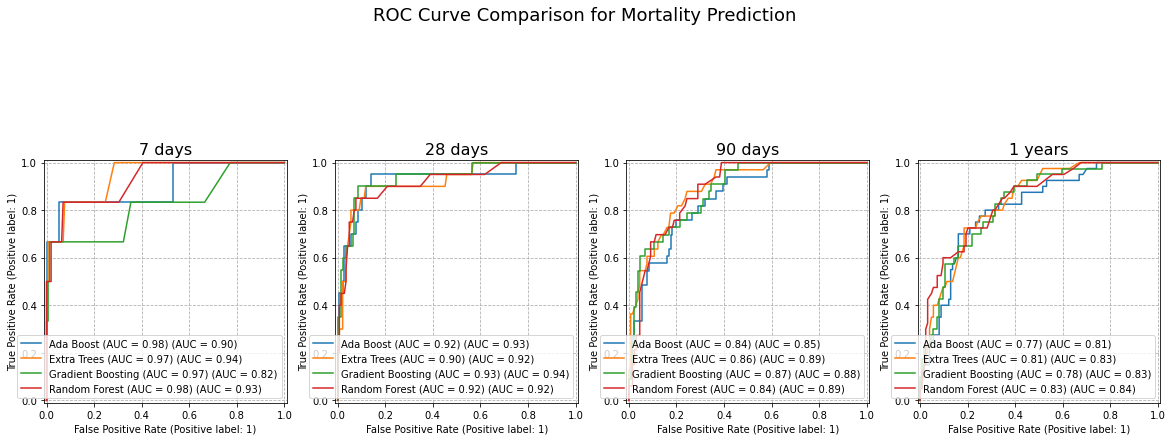

In [47]:
from sklearn.base import clone
# ... các thư viện khác đã nhập trước đó ...

# Định nghĩa các mô hình cơ sở
base_models ={
    'Ada Boost': AdaBoostClassifier(random_state=2026), # Thêm random_state để đảm bảo khả năng tái tạo
    'Extra Trees': ExtraTreesClassifier(random_state=2026),
    'Gradient Boosting': GradientBoostingClassifier(random_state=2026),
    'Random Forest': RandomForestClassifier(random_state=2026)
}

mortalities = ['mortality_7d', 'mortality_28d', 'mortality_90d', 'mortality_1y']
X, Y = df[cols], df[mortalities]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2026)
titles = ['7 days', '28 days', '90 days', '1 years']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

# Dictionary để lưu các mô hình đã huấn luyện (để bạn có thể lưu lại bằng joblib sau này)
trained_models = {}

for i in range(len(mortalities)):
    target_name = mortalities[i]
    y_train, y_test = Y_train[target_name], Y_test[target_name]
    
    # Tạo một dictionary để lưu trữ mô hình cho mục tiêu hiện tại
    trained_models[target_name] = {}
    
    for name in base_models:
        # 1. SAO CHÉP MÔ HÌNH: Đảm bảo mỗi mô hình là một thể hiện mới 
        # và chỉ được huấn luyện cho mục tiêu hiện tại
        model = clone(base_models[name])
        
        # 2. HUẤN LUYỆN
        print(f"Training {name} for {target_name}...")
        model.fit(X_train, y_train)
        
        # 3. LƯU MÔ HÌNH ĐÃ HUẤN LUYỆN VÀO DICTIONARY
        trained_models[target_name][name] = model

        # 4. VẼ ĐƯỜNG CONG ROC
        RocCurveDisplay.from_estimator(
            estimator=model, 
            X=X_test, 
            y=y_test, 
            ax=axes[i], 
            name=f'{name} (AUC = {model.score(X_test, y_test):.2f})' # Tùy chọn: Thêm AUC score
        )
        
    axes[i].set_title(titles[i], fontsize=16)
    axes[i].grid(linestyle='--')

plt.suptitle('ROC Curve Comparison for Mortality Prediction', fontsize=18)
plt.show()

In [48]:
X_test.to_csv('X_test.csv',index=None )
Y_test.to_csv('Y_test.csv',index=None )

In [ ]:
# for name in models:
#     model = models[name]
#     joblib.dump(model, f'{name.replace(" ", "")}.joblib')


In [49]:
# --- BƯỚC LƯU MÔ HÌNH ĐÃ HUẤN LUYỆN CHÍNH XÁC ---
# Sau khi chạy đoạn mã trên, bạn có thể lưu các mô hình như sau:
for target, models_dict in trained_models.items():
    for name, model in models_dict.items():
        filename = f'{name.replace(" ", "")}_{target}.joblib'
        joblib.dump(model, filename)
        print(f"Saved model: {filename}")

Saved model: AdaBoost_mortality_7d.joblib
Saved model: ExtraTrees_mortality_7d.joblib
Saved model: GradientBoosting_mortality_7d.joblib
Saved model: RandomForest_mortality_7d.joblib
Saved model: AdaBoost_mortality_28d.joblib
Saved model: ExtraTrees_mortality_28d.joblib
Saved model: GradientBoosting_mortality_28d.joblib
Saved model: RandomForest_mortality_28d.joblib
Saved model: AdaBoost_mortality_90d.joblib
Saved model: ExtraTrees_mortality_90d.joblib
Saved model: GradientBoosting_mortality_90d.joblib
Saved model: RandomForest_mortality_90d.joblib
Saved model: AdaBoost_mortality_1y.joblib
Saved model: ExtraTrees_mortality_1y.joblib
Saved model: GradientBoosting_mortality_1y.joblib
Saved model: RandomForest_mortality_1y.joblib
